In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import io
from subprocess import check_output

print(check_output(["ls", "./input"]).decode("utf8"))

attributes.csv
product_descriptions.csv
sample_submission.csv
test.csv
train.csv



In [4]:
# load files
training_data = pd.read_csv("./input/train.csv", encoding="ISO-8859-1")
testing_data = pd.read_csv("./input/test.csv", encoding="ISO-8859-1")
attribute_data = pd.read_csv("./input/attributes.csv")
descriptions = pd.read_csv("./input/product_descriptions.csv")

In [6]:
print (training_data[:10])

   id  product_uid                                      product_title  \
0   2       100001                  Simpson Strong-Tie 12-Gauge Angle   
1   3       100001                  Simpson Strong-Tie 12-Gauge Angle   
2   9       100002  BEHR Premium Textured DeckOver 1-gal. #SC-141 ...   
3  16       100005  Delta Vero 1-Handle Shower Only Faucet Trim Ki...   
4  17       100005  Delta Vero 1-Handle Shower Only Faucet Trim Ki...   
5  18       100006  Whirlpool 1.9 cu. ft. Over the Range Convectio...   
6  20       100006  Whirlpool 1.9 cu. ft. Over the Range Convectio...   
7  21       100006  Whirlpool 1.9 cu. ft. Over the Range Convectio...   
8  23       100007  Lithonia Lighting Quantum 2-Light Black LED Em...   
9  27       100009  House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...   

            search_term  relevance  
0         angle bracket       3.00  
1             l bracket       2.50  
2             deck over       3.00  
3      rain shower head       2.33  
4    shower

In [7]:
# merge descriptions
training_data = pd.merge(training_data, descriptions, on="product_uid", how="left")

In [8]:
print (training_data[:10])

   id  product_uid                                      product_title  \
0   2       100001                  Simpson Strong-Tie 12-Gauge Angle   
1   3       100001                  Simpson Strong-Tie 12-Gauge Angle   
2   9       100002  BEHR Premium Textured DeckOver 1-gal. #SC-141 ...   
3  16       100005  Delta Vero 1-Handle Shower Only Faucet Trim Ki...   
4  17       100005  Delta Vero 1-Handle Shower Only Faucet Trim Ki...   
5  18       100006  Whirlpool 1.9 cu. ft. Over the Range Convectio...   
6  20       100006  Whirlpool 1.9 cu. ft. Over the Range Convectio...   
7  21       100006  Whirlpool 1.9 cu. ft. Over the Range Convectio...   
8  23       100007  Lithonia Lighting Quantum 2-Light Black LED Em...   
9  27       100009  House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...   

            search_term  relevance  \
0         angle bracket       3.00   
1             l bracket       2.50   
2             deck over       3.00   
3      rain shower head       2.33   
4    s

In [9]:
# merge product counts
product_counts = pd.DataFrame(pd.Series(training_data.groupby(["product_uid"]).size(), name="product_count"))

In [10]:
print (product_counts[:10])

             product_count
product_uid               
100001                   2
100002                   1
100005                   2
100006                   3
100007                   1
100009                   1
100010                   1
100011                   3
100012                   1
100013                   1


In [11]:
training_data = pd.merge(training_data, product_counts, left_on="product_uid", right_index=True, how="left")

In [12]:
print (training_data[:10])

   id  product_uid                                      product_title  \
0   2       100001                  Simpson Strong-Tie 12-Gauge Angle   
1   3       100001                  Simpson Strong-Tie 12-Gauge Angle   
2   9       100002  BEHR Premium Textured DeckOver 1-gal. #SC-141 ...   
3  16       100005  Delta Vero 1-Handle Shower Only Faucet Trim Ki...   
4  17       100005  Delta Vero 1-Handle Shower Only Faucet Trim Ki...   
5  18       100006  Whirlpool 1.9 cu. ft. Over the Range Convectio...   
6  20       100006  Whirlpool 1.9 cu. ft. Over the Range Convectio...   
7  21       100006  Whirlpool 1.9 cu. ft. Over the Range Convectio...   
8  23       100007  Lithonia Lighting Quantum 2-Light Black LED Em...   
9  27       100009  House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...   

            search_term  relevance  \
0         angle bracket       3.00   
1             l bracket       2.50   
2             deck over       3.00   
3      rain shower head       2.33   
4    s

In [17]:
print(attribute_data)

         product_uid                         name  \
0             100001                     Bullet01   
1             100001                     Bullet02   
2             100001                     Bullet03   
3             100001                     Bullet04   
4             100001                     Bullet05   
5             100001                     Bullet06   
6             100001                     Bullet07   
7             100001                        Gauge   
8             100001                     Material   
9             100001               MFG Brand Name   
10            100001             Number of Pieces   
11            100001          Product Depth (in.)   
12            100001         Product Height (in.)   
13            100001         Product Weight (lb.)   
14            100001          Product Width (in.)   
15            100002           Application Method   
16            100002        Assembled Depth (in.)   
17            100002       Assembled Height (i

In [15]:
print (attribute_data[attribute_data.name == "MFG Brand Name"][:5])

     product_uid            name                           value
9         100001  MFG Brand Name              Simpson Strong-Tie
37        100002  MFG Brand Name  BEHR Premium Textured DeckOver
69        100003  MFG Brand Name                        STERLING
93        100004  MFG Brand Name                     Grape Solar
122       100005  MFG Brand Name                           Delta


#### Information on MFG Brand Name:
https://thdidm.zendesk.com/entries/52142689-MFG-Brand-Name

In [18]:
# merge brand names
brand_names = attribute_data[attribute_data.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "brand_name"})

In [20]:
# merge brand names
brand_names = attribute_data[attribute_data.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "brand_name"})
training_data = pd.merge(training_data, brand_names, on="product_uid", how="left")

In [22]:
training_data.brand_name.fillna("Unknown", inplace=True)

In [25]:
print(str(training_data.info()))
print(str(training_data.describe()))
training_data[:50]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74067 entries, 0 to 74066
Data columns (total 8 columns):
id                     74067 non-null int64
product_uid            74067 non-null int64
product_title          74067 non-null object
search_term            74067 non-null object
relevance              74067 non-null float64
product_description    74067 non-null object
product_count          74067 non-null int64
brand_name             74067 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 5.1 MB
None
                  id    product_uid     relevance  product_count
count   74067.000000   74067.000000  74067.000000   74067.000000
mean   112385.709223  142331.911553      2.381634       1.935450
std     64016.573650   30770.774864      0.533984       1.706594
min         2.000000  100001.000000      1.000000       1.000000
25%     57163.500000  115128.500000      2.000000       1.000000
50%    113228.000000  137334.000000      2.330000       1.000000
75%    168275

,id,product_uid,product_title,search_term,relevance,product_description,product_count,brand_name
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ...",2,Simpson Strong-Tie
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ...",2,Simpson Strong-Tie
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...,1,BEHR Premium Textured DeckOver
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...,2,Delta
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...,2,Delta
5,18,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,convection otr,3.00,Achieving delicious results is almost effortle...,3,Whirlpool
6,20,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwave over stove,2.67,Achieving delicious results is almost effortle...,3,Whirlpool
7,21,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwaves,3.00,Achieving delicious results is almost effortle...,3,Whirlpool
8,23,100007,Lithonia Lighting Quantum 2-Light Black LED Em...,emergency light,2.67,The Quantum Adjustable 2-Light LED Black Emerg...,1,Lithonia Lighting
9,27,100009,House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...,mdf 3/4,3.00,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...,1,House of Fara


##### TODO: Try to guess what was the relevance for each user ( e.g. 3.00 means that three users rated a 3). 
##### Not sure how it can help, but it can be useful for a feature weight.
##### There are some "Unbranded" value as well. If we combine these with "Unknown" or replace "Unknown" with "Unbranded"
##### Look into other attributes that are relevant (material and functionality) besides brand name

In [36]:
#print(training_data.value[training_data.brand_name=="Unknown"].value_counts())
print (training_data.brand_name.value_counts())
print(attribute_data.name.value_counts())

#look into other attrbutes like indoor outdoor
print (attribute_data[attribute_data.name == "Indoor/Outdoor"])
print(attribute_data.value[attribute_data.name == "Indoor/Outdoor"].value_counts())

Unknown                       17556
Unbranded                      2165
Hampton Bay                    1446
GE                              959
Everbilt                        840
Home Decorators Collection      769
KOHLER                          731
DEWALT                          665
Delta                           612
Philips                         570
Ryobi                           566
Glacier Bay                     533
Prime-Line                      530
MOEN                            459
Milwaukee                       456
...
Veranda HP      1
Global Water    1
Touchdog        1
Montezuma       1
1-2-3Mortar     1
Hamilton        1
Hello Kitty     1
Keurig          1
Bull Dog        1
Suntec          1
Vika            1
Water Tech      1
Heritage        1
Axxess          1
KOBOT           1
Length: 3144, dtype: int64
MFG Brand Name          86250
Bullet02                86248
Bullet03                86226
Bullet04                86174
Bullet01                85940
Product W

In [37]:
training_data["id_bins"] = pd.cut(training_data.id, 20, labels=False)
print(training_data.corr(method="spearman"))
training_data.describe()

                     id  product_uid  relevance  product_count   id_bins
id             1.000000     1.000000  -0.126681      -0.484873  0.998746
product_uid    1.000000     1.000000  -0.126681      -0.484873  0.998746
relevance     -0.126681    -0.126681   1.000000      -0.026358 -0.126639
product_count -0.484873    -0.484873  -0.026358       1.000000 -0.484009
id_bins        0.998746     0.998746  -0.126639      -0.484009  1.000000


,id,product_uid,relevance,product_count,id_bins
count,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000
mean,112385.709223,142331.911553,2.381634,1.935450,9.648764
std,64016.573650,30770.774864,0.533984,1.706594,5.773127
min,2.000000,100001.000000,1.000000,1.000000,0.000000
25%,57163.500000,115128.500000,2.000000,1.000000,5.000000
50%,113228.000000,137334.000000,2.330000,1.000000,10.000000
75%,168275.500000,166883.500000,3.000000,2.000000,15.000000
max,221473.000000,206650.000000,3.000000,21.000000,19.000000


3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.25       11
2.75       11
1.75        9
1.50        5
1.25        4
dtype: int64

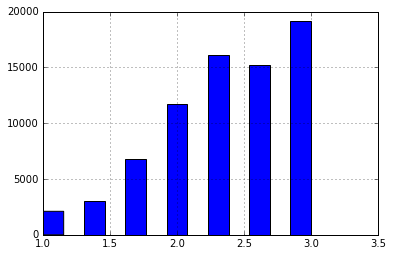

In [39]:
training_data.relevance.hist()
training_data.relevance.value_counts()

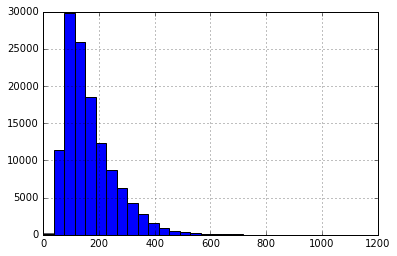

In [51]:
#Distribution of the amount of characters per description
(descriptions.product_description.str.len() / 5).hist(bins=30)

10.6    1332
11.6    1324
12.0    1306
11.2    1301
13.2    1262
12.2    1262
11.8    1261
12.4    1259
12.8    1244
13.8    1239
13.6    1236
13.0    1231
11.0    1230
10.8    1229
10.2    1196
...
29.4    17
28.2    17
3.0     16
28.0    12
28.4     9
2.8      9
1.8      5
2.2      5
2.4      5
28.6     4
29.2     3
2.6      2
29.0     1
28.8     1
2.0      1
Length: 139, dtype: int64

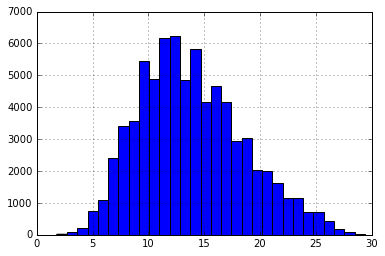

In [55]:
(training_data.product_title.str.len() / 5).hist(bins=30)
(training_data.product_title.str.len() / 5).value_counts()

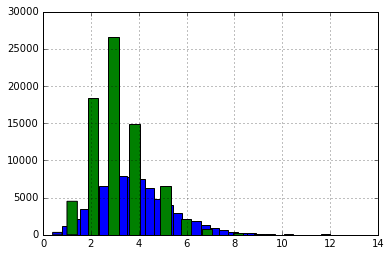

In [66]:
#the number of words/terms in the search term
#(training_data.search_term.str.count("\\s+") + 1).value_counts()
(training_data.search_term.str.len() / 5.).hist(bins=30)
(training_data.search_term.str.count("\\s+") + 1).hist(bins=30)

In [67]:
#This shows the amount of produts that belong to that same UID
testing_data.product_uid.value_counts()

101892    52
101280    35
101442    35
101148    34
102456    31
100898    31
102162    30
104691    27
109594    27
101959    26
102235    26
102954    26
101312    26
101024    25
105369    25
...
219302    1
217255    1
207016    1
204969    1
211114    1
209067    1
196781    1
125168    1
116980    1
114933    1
119031    1
112890    1
110843    1
162050    1
110474    1
Length: 97460, dtype: int64

In [68]:
print (len(training_data))
print (len(testing_data))

74067
166693


In [76]:
#unique product distribution
training_products = training_data.product_uid.value_counts()
testing_products = testing_data.product_uid.value_counts()
training_norm = np.sqrt((training_products ** 2).sum())
testing_norm = np.sqrt((testing_products ** 2).sum())
product_uid_cos = (training_products * testing_products).sum() / (training_norm * testing_norm)
print("Product distribution cosine:", product_uid_cos)

Product distribution cosine: 0.574127362447


In [83]:
import collections

#counts in percentage of the most common characters
chars = collections.Counter()
for title in training_data.product_title:
    chars.update(title.lower())
total = sum(chars.values())
print("Title char counts")
for c, count in chars.most_common(30):
    print("0x{:02x} {}: {:.1f}%".format(ord(c),  c, 100. * count / total))
    
#counts in percentage of the most commonn 
words = collections.Counter()
for title in training_data.search_term:
    words.update(title.lower().split())
total = sum(words.values())
print("Search word counts")
for word, count in words.most_common(200):
    print("{}: {:.1f}% ({:,})".format(word, 100. * count / total, count))    

Title char counts
0x20  : 15.3%
0x65 e: 7.9%
0x69 i: 6.7%
0x61 a: 5.8%
0x74 t: 5.8%
0x6e n: 5.6%
0x72 r: 5.4%
0x6f o: 4.9%
0x6c l: 4.8%
0x73 s: 4.0%
0x63 c: 3.2%
0x64 d: 2.8%
0x68 h: 2.4%
0x70 p: 2.1%
0x75 u: 2.0%
0x6d m: 2.0%
0x2e .: 1.9%
0x67 g: 1.8%
0x62 b: 1.6%
0x77 w: 1.5%
0x66 f: 1.4%
0x2d -: 1.3%
0x31 1: 1.0%
0x6b k: 1.0%
0x78 x: 0.8%
0x32 2: 0.8%
0x79 y: 0.8%
0x76 v: 0.8%
0x30 0: 0.7%
0x34 4: 0.5%
Search word counts
door: 1.1% (2,679)
light: 0.9% (2,021)
for: 0.8% (1,815)
in: 0.7% (1,665)
inch: 0.6% (1,487)
wall: 0.6% (1,442)
shower: 0.6% (1,429)
with: 0.6% (1,417)
white: 0.6% (1,354)
wood: 0.6% (1,349)
x: 0.6% (1,347)
tile: 0.6% (1,338)
and: 0.5% (1,165)
paint: 0.5% (1,145)
cabinet: 0.5% (1,061)
outdoor: 0.4% (1,052)
water: 0.4% (1,034)
vanity: 0.4% (977)
kitchen: 0.4% (969)
bathroom: 0.4% (963)
doors: 0.4% (960)
gas: 0.4% (925)
led: 0.4% (899)
lights: 0.4% (840)
air: 0.4% (839)
ceiling: 0.3% (805)
sink: 0.3% (801)
2: 0.3% (780)
1/2: 0.3% (772)
faucet: 0.3% (772)
kit: 0.3% (77

In [84]:
#count how much of an attribute exist in search_terms...
#(This is a great idea to check which attribute is more relevant)
print("Indoor/outdoor", training_data.search_term.str.contains("indoor|outdoor|interior|exterior", case=False).value_counts())
print("Contains numbers", training_data.search_term.str.contains("\\d", case=False).value_counts())

Indoor/outdoor False    72003
True      2064
dtype: int64
Contains numbers False    55811
True     18256
dtype: int64


In [85]:
#count the number and percentage of certain attribute of the total attributes avaialable:
def summarize_values(name, values):
    values.fillna("", inplace=True)
    counts = collections.Counter()
    for value in values:
        counts[value.lower()] += 1
    
    total = sum(counts.values())
    print("{} counts ({:,} values)".format(name, total))
    for word, count in counts.most_common(20):
        print("{}: {:.1f}% ({:,})".format(word, 100. * count / total, count))

for attribute_name in ["Color Family", "Color/Finish", "Material", "MFG Brand Name", "Indoor/Outdoor", "Commercial / Residential"]:
    summarize_values("\n" + attribute_name, attribute_data[attribute_data.name == attribute_name].value)


Color Family counts (41,508 values)
white: 15.8% (6,546)
black: 7.5% (3,115)
brown: 5.6% (2,339)
gray: 4.6% (1,892)
whites: 4.4% (1,829)
chrome: 3.9% (1,616)
browns / tans: 3.5% (1,463)
red: 3.0% (1,239)
blacks: 3.0% (1,237)
bronze: 2.8% (1,151)
metallics: 2.6% (1,078)
nickel: 2.5% (1,028)
beige: 2.3% (950)
grays: 2.3% (939)
blue: 2.1% (891)
silver: 2.1% (871)
stainless steel: 2.0% (824)
beige / cream: 1.9% (788)
greens: 1.7% (713)
multi: 1.6% (669)

Color/Finish counts (28,564 values)
white: 14.4% (4,115)
black: 5.7% (1,628)
stainless steel: 3.7% (1,065)
chrome: 3.5% (995)
gray: 1.7% (482)
brushed nickel: 1.7% (473)
oil rubbed bronze: 1.3% (375)
polished chrome: 1.3% (370)
brown: 1.1% (328)
primed white: 1.1% (324)
clear: 1.1% (316)
red: 0.9% (251)
blue: 0.8% (218)
satin nickel: 0.7% (213)
beige: 0.7% (210)
silver: 0.7% (198)
biscuit: 0.7% (196)
almond: 0.7% (187)
stainless: 0.6% (180)
bronze: 0.6% (176)

Material counts (31,500 values)
steel: 13.2% (4,151)
metal: 9.6% (3,029)
plasti

/usr/lib/python3/dist-packages/pandas/core/generic.py:2367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [86]:
print (training_data[:10])

   id  product_uid                                      product_title  \
0   2       100001                  Simpson Strong-Tie 12-Gauge Angle   
1   3       100001                  Simpson Strong-Tie 12-Gauge Angle   
2   9       100002  BEHR Premium Textured DeckOver 1-gal. #SC-141 ...   
3  16       100005  Delta Vero 1-Handle Shower Only Faucet Trim Ki...   
4  17       100005  Delta Vero 1-Handle Shower Only Faucet Trim Ki...   
5  18       100006  Whirlpool 1.9 cu. ft. Over the Range Convectio...   
6  20       100006  Whirlpool 1.9 cu. ft. Over the Range Convectio...   
7  21       100006  Whirlpool 1.9 cu. ft. Over the Range Convectio...   
8  23       100007  Lithonia Lighting Quantum 2-Light Black LED Em...   
9  27       100009  House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...   

            search_term  relevance  \
0         angle bracket       3.00   
1             l bracket       2.50   
2             deck over       3.00   
3      rain shower head       2.33   
4    s

In [87]:
#save the datasets in a pickle file for better retrieval
import pickle as pickle
pickle_file = 'searches.pickle'

def data_to_pickle(training, testing, attributes, descriptions):
    try:
        f = open(pickle_file, 'wb')
        save = {
            'training_data': training,
            'testing_data': testing,
            'attribute_data': attributes,
            'descriptions': descriptions,
        }
        pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
        f.close()
    except Exception as e:
        print ('Unable to save data to', pickle_file, ':', e)
        raise

data_to_pickle(training_data, testing_data, attribute_data, descriptions)